<a href="https://colab.research.google.com/github/goudaChees/MLstudy/blob/master/0703_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='/content/drive/MyDrive/code/04.exam/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [2]:
retail_df.info() #info 부터 확인해본다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
retail_df.describe()
# 자료가 이상하다는 것을 확인해야함.
# 양이나 갯수가 가장작은게 -8만개, 금액이 -1만1천 이라는 수치가 뭔가 이상하다.

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 각 컬럼별로 데이터 확인해보기
 - 그래프(plot), value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


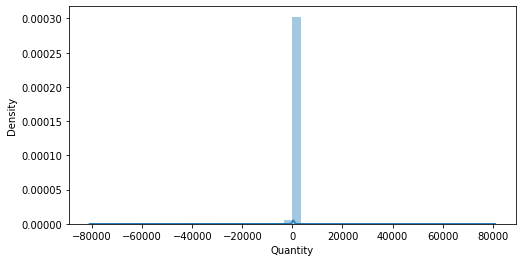

In [4]:
import seaborn as sns
plt.figure(figsize = (8,4))
sns.distplot(retail_df['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


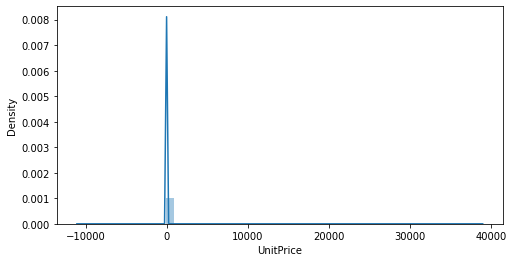

In [5]:
import seaborn as sns
plt.figure(figsize = (8,4))
sns.distplot(retail_df['UnitPrice'])

In [9]:
len(retail_df.InvoiceNo.unique())

25900

In [10]:
len(retail_df.StockCode.unique())

4070

In [11]:
retail_df.StockCode.value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [14]:
stockcode_df = retail_df.StockCode.value_counts()
type(stockcode_df)

pandas.core.series.Series

(array([1.325e+03, 5.050e+02, 3.160e+02, 2.870e+02, 2.280e+02, 1.930e+02,
        1.650e+02, 1.330e+02, 1.060e+02, 1.120e+02, 7.400e+01, 7.800e+01,
        5.200e+01, 4.500e+01, 4.500e+01, 4.100e+01, 5.000e+01, 2.000e+01,
        2.700e+01, 3.500e+01, 2.300e+01, 1.800e+01, 1.100e+01, 1.600e+01,
        1.400e+01, 1.300e+01, 1.000e+01, 7.000e+00, 9.000e+00, 9.000e+00,
        9.000e+00, 4.000e+00, 6.000e+00, 6.000e+00, 4.000e+00, 5.000e+00,
        2.000e+00, 5.000e+00, 6.000e+00, 4.000e+00, 6.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

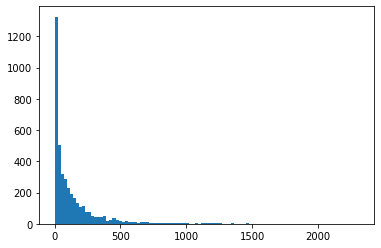

In [15]:
plt.hist(stockcode_df, bins=100)

In [16]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
retail_df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [18]:
len(retail_df['Country'].unique())

38

# 쓸모 없는 행 지우기
 - quantity, unitprice <0 (반품한것)
 - 고객 그룹을 나누고 싶기 때문에 고객 ID가 0인것 지우기

In [25]:
retail_df = retail_df[retail_df['Quantity'] > 0]
# quantity 의 값이 0 보다 큰 행을 뽑아온다.

retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
retail_df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

In [29]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


### RFM 기반 데이터 가공

**구매금액 생성**

In [32]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
#구매량을 확인 하고 싶어 새로운 컬럼을 추가시킴
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
# float형이던 커스터머ID를 int형으로 바꿔준다. 

In [33]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [34]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

**고객 기준으로 Recency, Frequency, Monetary가공**

In [35]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()

#set으로 aggregations 로 만든다. 
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
#다했다 싶으면 인덱스는 리셋 해주는 것이 좋다. 
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


### germany ver로 실습

In [41]:
retail_df2 = pd.read_excel(io='/content/drive/MyDrive/code/04.exam/Online Retail.xlsx')

In [42]:
retail_df2 = retail_df2[retail_df2['Quantity'] > 0]
# quantity 의 값이 0 보다 큰 행을 뽑아온다.

retail_df2 = retail_df2[retail_df2['UnitPrice'] > 0]
retail_df2 = retail_df2[retail_df2['CustomerID'].notnull()]
print(retail_df2.shape)
retail_df2.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [43]:
retail_df_GER = retail_df2[retail_df2['Country']=='Germany']
print(retail_df_GER.shape)

(9040, 8)


In [46]:
retail_df_GER.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sale_amount
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662,Germany,17.7
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662,Germany,15.3
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662,Germany,10.2


In [45]:
retail_df_GER['sale_amount'] = retail_df['Quantity'] * retail_df2['UnitPrice']
#구매량을 확인 하고 싶어 새로운 컬럼을 추가시킴
retail_df_GER['CustomerID'] = retail_df2['CustomerID'].astype(int)
# float형이던 커스터머ID를 int형으로 바꿔준다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
print(retail_df_GER['CustomerID'].value_counts().head(5))
print(retail_df_GER.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

12621    467
12471    460
12474    424
12720    354
12472    339
Name: CustomerID, dtype: int64
CustomerID
12471    19824.05
12621    13689.67
12477    13219.74
12590     9864.26
12709     9736.52
Name: sale_amount, dtype: float64


In [48]:
retail_df_GER.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.0029956729168978

In [49]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()

#set으로 aggregations 로 만든다. 
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df_GER = retail_df_GER.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df_GER = cust_df_GER.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df_GER = cust_df_GER.reset_index()
#다했다 싶으면 인덱스는 리셋 해주는 것이 좋다. 
cust_df_GER.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12426,2011-05-29 12:26:00,30,582.73
1,12427,2011-11-18 08:56:00,31,825.80
2,12468,2011-06-05 11:36:00,38,729.54


## **Recency를 날짜에서 정수형으로 가공**

In [50]:
cust_df['Recency'].max()

Timestamp('2011-12-09 12:49:00')

In [52]:
cust_df['Recency'].min()

Timestamp('2010-12-01 09:53:00')

In [53]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

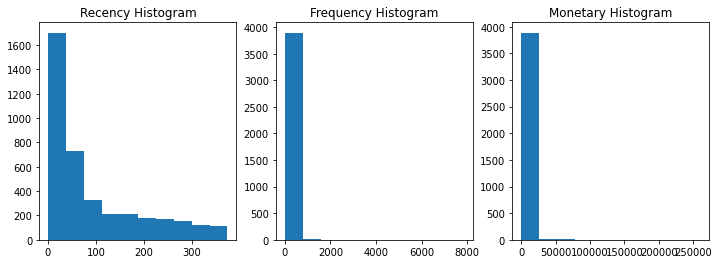

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [55]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


**K-Means로 군집화 후에 실루엣 계수 평가**

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
#실루엣스코어 

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


**K-Means 군집화 후에 실루엣 계수 및 군집을 시각화**

In [57]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [58]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

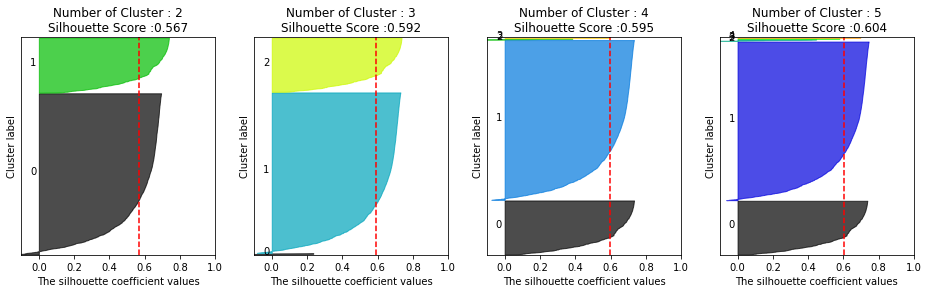

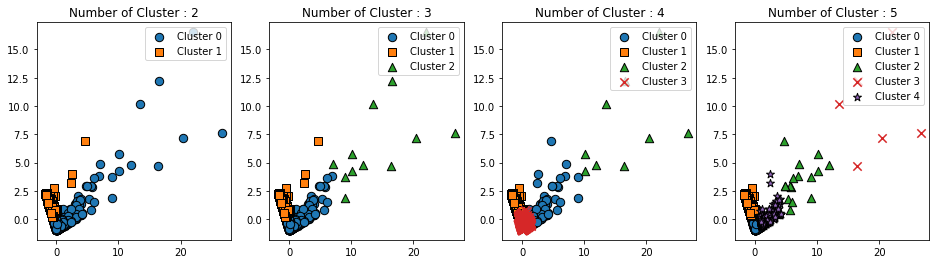

In [59]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [ ]:
#그래프의 형태가 그리 예쁘지 않음. 한쪽에만 몰려 있는 형태라 로그변환을 하고 다시 테스트 해보기

**로그 변환 후 재 시각화**

In [60]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.303


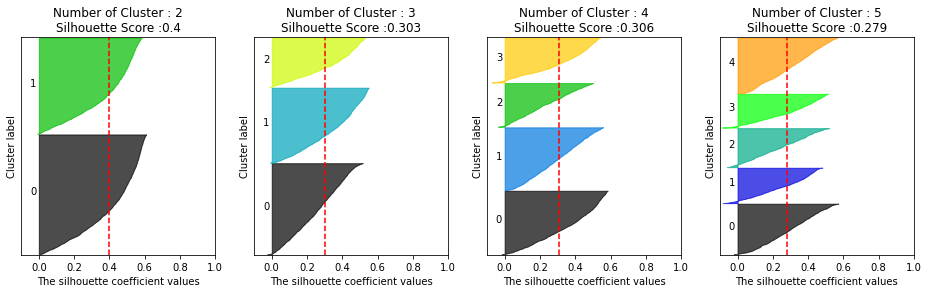

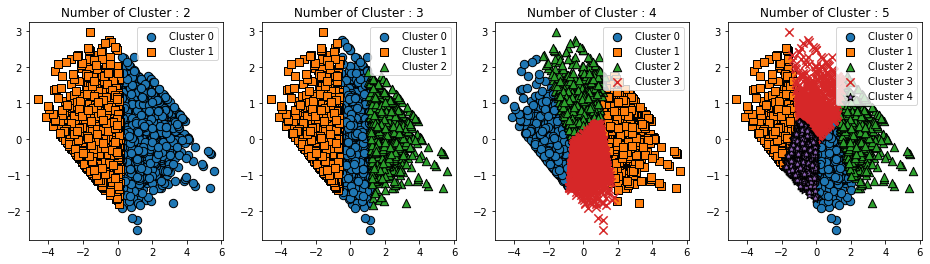

In [61]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [ ]:
#모양의 형태가 훨씬 더 깔끔한 모습

#독일 데이터(cust_df_GER) 로 실습


In [62]:
cust_df_GER['Recency'] = dt.datetime(2011,12,10) - cust_df_GER['Recency']
cust_df_GER['Recency'] = cust_df_GER['Recency'].apply(lambda x: x.days+1)
print('cust_df_GER 로우와 컬럼 건수는 ',cust_df_GER.shape)
cust_df_GER.head(3)

cust_df_GER 로우와 컬럼 건수는  (94, 4)


,CustomerID,Recency,Frequency,Monetary
0,12426,195,30,582.73
1,12427,22,31,825.80
2,12468,188,38,729.54


(array([59., 17.,  8.,  5.,  2.,  0.,  2.,  0.,  0.,  1.]),
 array([   63.   ,  2039.105,  4015.21 ,  5991.315,  7967.42 ,  9943.525,
        11919.63 , 13895.735, 15871.84 , 17847.945, 19824.05 ]),
 <a list of 10 Patch objects>)

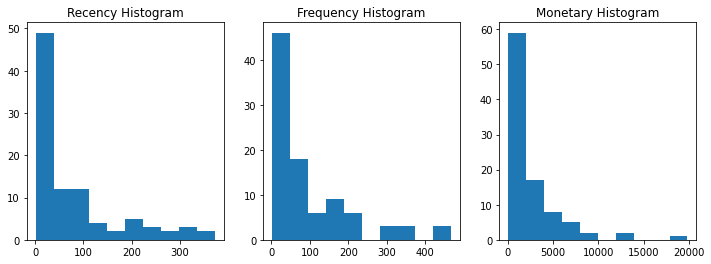

In [63]:
fig, (ax_G1,ax_G2,ax_G3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax_G1.set_title('Recency Histogram')
ax_G1.hist(cust_df_GER['Recency'])

ax_G2.set_title('Frequency Histogram')
ax_G2.hist(cust_df_GER['Frequency'])

ax_G3.set_title('Monetary Histogram')
ax_G3.hist(cust_df_GER['Monetary'])

In [64]:
cust_df_GER[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,94.000000,94.000000,94.000000
mean,78.117021,96.170213,2434.756809
std,91.382083,106.762790,3268.239206
min,1.000000,2.000000,63.000000
25%,17.250000,23.250000,530.150000
50%,31.500000,55.000000,1066.140000
75%,93.000000,141.250000,3328.692500
max,373.000000,467.000000,19824.050000


In [72]:
from sklearn.preprocessing import MinMaxScaler
X_features_GER = cust_df_GER[['Recency','Frequency','Monetary']].values
X_features_GER_scaled = MinMaxScaler().fit_transform(X_features_GER)

kmeans_GER = KMeans(n_clusters=4, random_state=0)
labels_GER = kmeans_GER.fit_predict(X_features_GER_scaled)
cust_df_GER['cluster_label'] = labels_GER

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_GER_scaled,labels_GER)))

실루엣 스코어는 : 0.491


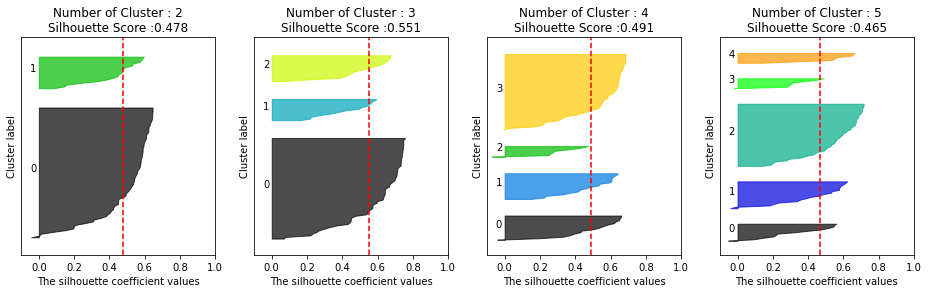

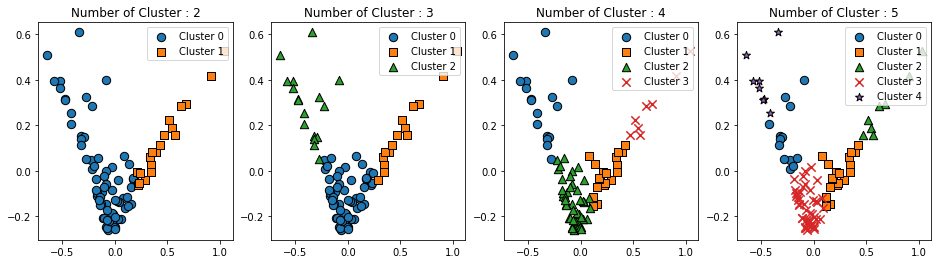

In [73]:
visualize_silhouette([2,3,4,5],X_features_GER_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_GER_scaled)

In [74]:
### Log 변환을 통해 데이터 변환
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df_GER['Recency_log'] = np.log1p(cust_df_GER['Recency'])
cust_df_GER['Frequency_log'] = np.log1p(cust_df_GER['Frequency'])
cust_df_GER['Monetary_log'] = np.log1p(cust_df_GER['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features_GER = cust_df_GER[['Recency_log','Frequency_log','Monetary_log']].values
X_features_GER_scaled = MinMaxScaler().fit_transform(X_features_GER)

kmeans_GER = KMeans(n_clusters=4, random_state=0)
labels_GER = kmeans_GER.fit_predict(X_features_GER_scaled)
cust_df_GER['cluster_label'] = labels_GER

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_GER_scaled,labels_GER)))


실루엣 스코어는 : 0.362


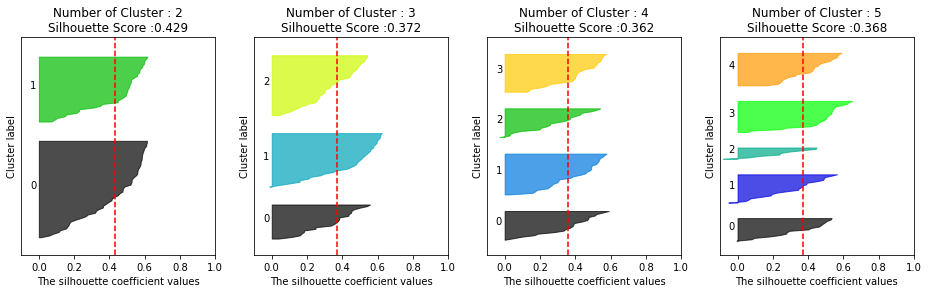

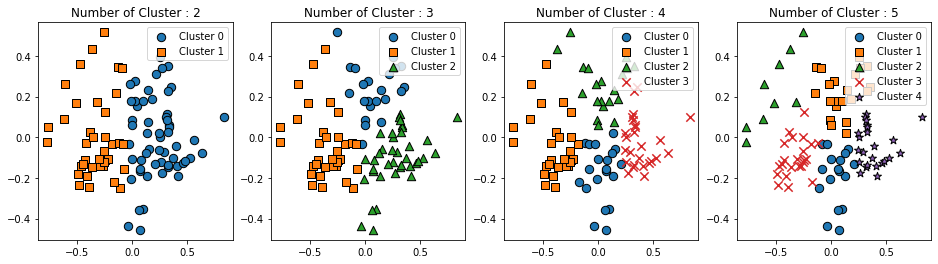

In [75]:
visualize_silhouette([2,3,4,5],X_features_GER_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_GER_scaled)

In [76]:
cust_df_GER

,CustomerID,Recency,Frequency,Monetary,cluster_label,Recency_log,Frequency_log,Monetary_log
0,12426,195,30,582.73,3,5.278115,3.433987,6.369439
1,12427,22,31,825.80,2,3.135494,3.465736,6.717563
2,12468,188,38,729.54,3,5.241747,3.663562,6.593784
3,12471,3,460,19824.05,1,1.386294,6.133398,9.894702
4,12472,33,339,6572.11,1,3.526361,5.828946,8.790742
...,...,...,...,...,...,...,...,...
89,13814,93,57,1579.12,0,4.543295,4.060443,7.365256
90,13815,23,176,4027.36,1,3.178054,5.176150,8.301115
91,13816,24,28,571.67,2,3.218876,3.367296,6.350310
92,13817,30,24,382.98,2,3.433987,3.218876,5.950590
